In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandahouse as ph
from scipy import stats

import tensorflow as tf
import tensorflow_probability as tfp

import causalimpact
from causalimpact import CausalImpact

sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

In [12]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'database': 'simulator_20230820',
    'user': 'student',
    'password': 'dpo_python_2020'   
}

In [13]:
q = '''
SELECT date_trunc('hour', time) as date,
       sum(action = 'like') / uniq(user_id) as likes_per_user,
       sum(action = 'view') / uniq(user_id) as views_per_user
FROM {db}.feed_actions
where time::date >= '2023-07-01'
and time::date <= '2023-08-19'
group by date
order by date
'''

df = ph.read_clickhouse(q, connection=connection)

<Axes: >

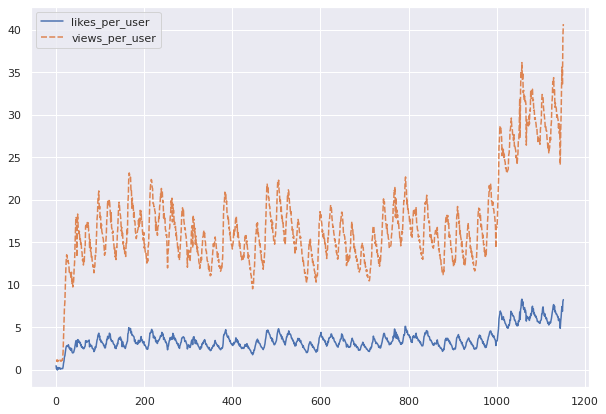

In [14]:
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(df)

Далее, необходим задать интервалы до флешмоба и после:

In [15]:
pre_period = [0, int(df[df.date == '2023-08-13 00:00:00'].index[0]) - 1]
post_period = [int(df[df.date == '2023-08-13 00:00:00'].index[0]), int(df.shape[0]) - 1]

In [16]:
impact = CausalImpact(df.views_per_user, pre_period, post_period)

2023-09-15 15:21:04.642333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-15 15:21:04.690580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-09-15 15:21:05.585540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-15 15:

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


2023-09-15 15:25:56.052146: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 393600000 exceeds 10% of free system memory.
2023-09-15 15:25:57.813485: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 393600000 exceeds 10% of free system memory.
2023-09-15 15:25:57.973223: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 393600000 exceeds 10% of free system memory.
2023-09-15 15:25:58.091456: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 393600000 exceeds 10% of free system memory.
2023-09-15 15:25:58.290348: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 393600000 exceeds 10% of free system memory.
2023-09-15 15:25:59.492728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/Additi

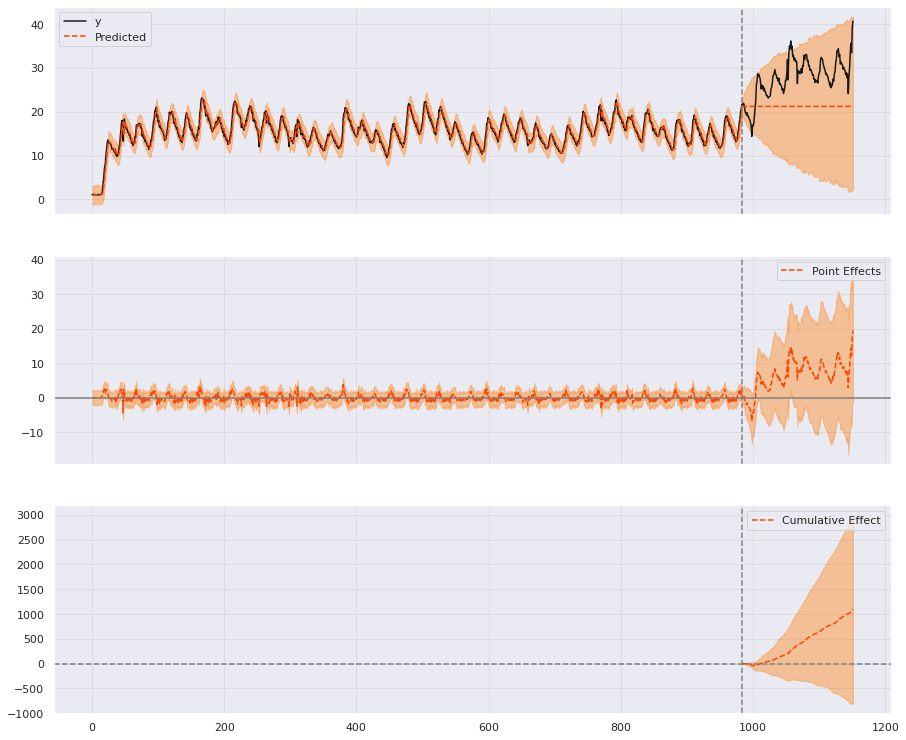

In [17]:
impact.plot(figsize = (15, 13))

In [18]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    27.76              4664.15
Prediction (s.d.)         21.23 (5.65)       3567.03 (949.96)
95% CI                    [10.64, 32.81]     [1787.82, 5511.59]

Absolute effect (s.d.)    6.53 (5.65)        1097.12 (949.96)
95% CI                    [-5.04, 17.12]     [-847.44, 2876.32]

Relative effect (s.d.)    30.76% (26.63%)    30.76% (26.63%)
95% CI                    [-23.76%, 80.64%]  [-23.76%, 80.64%]

Posterior tail-area probability p: 0.14
Posterior prob. of a causal effect: 85.51%

For more details run the command: print(impact.summary('report'))


средний прирост по просмотрам около ~ 30%

In [19]:
impact = CausalImpact(df.likes_per_user, pre_period, post_period)

2023-09-15 15:26:10.059774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-15 15:26:10.103938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-09-15 15:26:11.021576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-15 15:

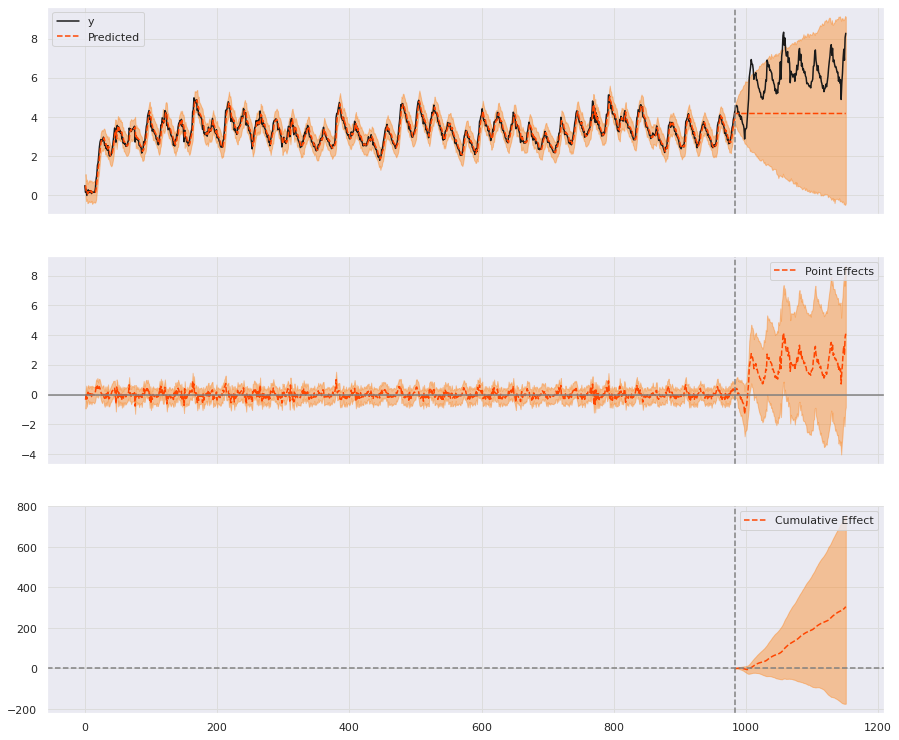

In [20]:
impact.plot(figsize = (15, 13))

In [21]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    6.0                1007.62
Prediction (s.d.)         4.18 (1.52)        702.38 (255.01)
95% CI                    [1.21, 7.16]       [204.06, 1203.68]

Absolute effect (s.d.)    1.82 (1.52)        305.24 (255.01)
95% CI                    [-1.17, 4.78]      [-196.06, 803.57]

Relative effect (s.d.)    43.46% (36.31%)    43.46% (36.31%)
95% CI                    [-27.91%, 114.41%] [-27.91%, 114.41%]

Posterior tail-area probability p: 0.11
Posterior prob. of a causal effect: 89.01%

For more details run the command: print(impact.summary('report'))


Прирост в среднем по лайкам составил 43.46% от ожидаемых значений.
Прирост в среднем по просмотрам составил 30.76% от ожидаемых значений.

Есть возможный эффект от флешмоба: пользователям, которые в нем учавствовали, приложение потенциально могло понравиться сильнее, следовательно показатели активности после него выросли в отличии от периода до флешмоба.

Думаю, что подобные события благоприятно влияют на общий показатель удержания нашей аудитории, поэтому стоит время от времени проводить подобные мероприятия (флешмобы).